In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab

In [2]:
image = cv2.imread("image.jpg")
# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [3]:
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)
print(pixel_values.shape)

(539429, 3)


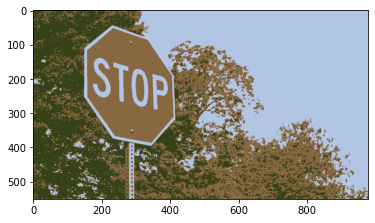

In [4]:
# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
# number of clusters (K)
k = 3
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()
# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)
# show the image
plt.imshow(segmented_image)
plt.show()

Text(0.5, 1.0, 'Cluster1')

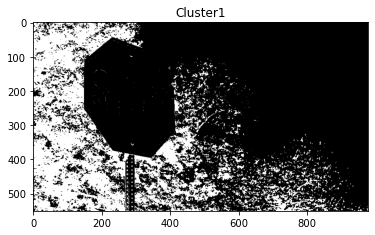

In [9]:
s1,s2,s3 = image.shape
cluster_labels = labels.reshape(s1,s2)
#cluster 1
cluster1loc1, cluster1loc2 = np.where(cluster_labels == 0)
blackblankimage1 = np.zeros(shape=[s1, s2], dtype=np.uint8)
blackblankimage1[cluster1loc1,cluster1loc2] = 1
plt.imshow(blackblankimage1,cmap='gray')
plt.title("Cluster1")

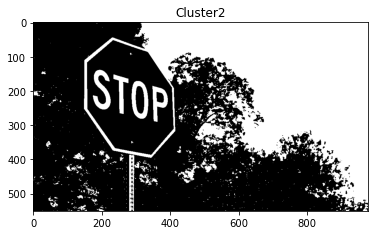

In [8]:
#cluster 2
cluster2loc1, cluster2loc2 = np.where(cluster_labels == 1)
blackblankimage2 = np.zeros(shape=[s1, s2], dtype=np.uint8)
#reshape_blank = blackblankimage.flatten()
blackblankimage2[cluster2loc1,cluster2loc2] = 1
plt.imshow(blackblankimage2, cmap='gray')
plt.title("Cluster2")
plt.show()

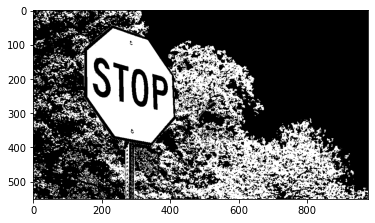

In [10]:
#cluster 3
cluster3loc1, cluster3loc2 = np.where(cluster_labels == 2)
blackblankimage3 = np.zeros(shape=[s1, s2], dtype=np.uint8)
#reshape_blank = blackblankimage.flatten()
blackblankimage3[cluster3loc1,cluster3loc2] = 1
plt.imshow(blackblankimage3,cmap='gray')
plt.show()
